# Predicting movie popularity using IMDB movies dataset

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [2]:
# importing the dataset
data = pd.read_csv('movie_metadata.csv')

In [3]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


## Data exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
# number of unique values in each column
data.nunique()

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        439
title_year                     91
actor_2_facebook_likes        917
imdb_score                     78
aspect_ratio                   22
movie_facebook_likes          876
dtype: int64

In [6]:
# See the numeric attributes of the dataset
data.describe(include = [np.number])

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# Number of unique categorical attributes of the dataset
data.describe(include = [np.object])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,The Fast and the Furious,Steve Coogan,based on novel,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


## Data preparation

### Removing duplicates

First we start off by checking for duplicates and removing them.

In [8]:
# checking for duplicate rows based on movie title
print('entries from dataset:', data.shape[0])
duplicates = data.duplicated()
print('number of duplicated entries:', sum(duplicates))

entries from dataset: 5043
number of duplicated entries: 45


In [9]:
# removing the duplicates
data = data.drop_duplicates()
print('entries without duplicates:', data.shape[0])

entries without duplicates: 4998


### Removing features that won't help us determine movie success

Is the color impactful to the model?

In [10]:
data['color'].describe()

count      4979
unique        2
top       Color
freq       4772
Name: color, dtype: object

We can see that out of the 4979 entries for "color", 4772 were "Color". Nearly 96% of movies are colored. We remove this feature.

In [11]:
data = data.drop(['color'], axis = 1)

The IMDB links are also useless to us so let's remove those as well.

In [12]:
data = data.drop(['movie_imdb_link'], axis = 1)

Another column we will remove is the 'plot keywords'. There is just too much diversity in this feature for it to be a good predictor of the score and revenue.

In [13]:
data = data.drop(['plot_keywords'], axis = 1)

## Data Cleaning

We need to clean up NaN and null values.

In [14]:
nandata = data.isnull().sum().to_frame('Number of NaN').sort_values(by = ['Number of NaN'], ascending = False)
nandata

,Number of NaN
gross,874
budget,487
aspect_ratio,327
content_rating,301
title_year,107
director_name,103
director_facebook_likes,103
num_critic_for_reviews,49
actor_3_facebook_likes,23
actor_3_name,23


We see that gross and budget have the most NaN values. These are two of the most important predictors so we want to keep them. In order to do so, we must remove the rows that have missing values.

In [15]:
data = data.dropna(subset = ['gross'])
data = data.dropna(subset = ['budget'])
nandata = data.isnull().sum().to_frame('Number of NaN').sort_values(by = ['Number of NaN'], ascending = False)
nandata

,Number of NaN
aspect_ratio,74
content_rating,51
actor_3_facebook_likes,10
actor_3_name,10
facenumber_in_poster,6
actor_2_facebook_likes,5
actor_2_name,5
actor_1_name,3
language,3
actor_1_facebook_likes,3


In [16]:
data.shape

(3857, 25)

Removing all those rows left us with 3857 rows to work with.

We still have more columns with missing values. Next let's check the importance of 'aspect_ratio'. 

In [17]:
# get the frequency of each aspect ratio
data.aspect_ratio.value_counts()

2.35     1995
1.85     1600
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       10
2.40        3
2.76        3
2.00        3
1.75        2
2.24        1
1.18        1
2.55        1
1.77        1
16.00       1
1.50        1
Name: aspect_ratio, dtype: int64

From this we see that the two most popular aspect ratios are 2.35 and 1.85. Let's see if this has any impact on the rating.

In [18]:
# replace missing values with 0
tempDf = data.fillna(value = {'aspect_ratio': 0})
arDf1 = tempDf[tempDf['aspect_ratio'] == 1.85]
print('1.85:', arDf1['imdb_score'].mean())
arDf2 = tempDf[tempDf['aspect_ratio'] == 2.35]
print('2.35:', arDf2['imdb_score'].mean())
arDf3 = tempDf[(tempDf['aspect_ratio'] != 1.85) & (tempDf['aspect_ratio'] != 2.35)]
print('other:', arDf3['imdb_score'].mean())

1.85: 6.373937500000018
2.35: 6.508471177944862
other: 6.672519083969459


As we can see from above, aspect ratio does not make much difference in the IMDB score. We are going to remove it.

In [19]:
data = data.drop(['aspect_ratio'], axis = 1)

In [129]:
nandata = data.isnull().sum().to_frame('Number of NaN').sort_values(by = ['Number of NaN'], ascending = False)
nandata

,Number of NaN
content_rating,51
actor_3_facebook_likes,10
actor_3_name,10
facenumber_in_poster,6
actor_2_name,5
actor_2_facebook_likes,5
language,3
actor_1_facebook_likes,3
actor_1_name,3
duration,1


Let's look at 'content rating' next.

In [20]:
data.content_rating.value_counts()

R            1723
PG-13        1314
PG            573
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

It's not shown above but looking into the dataset, we see that there are missing values that are simply "". We need to remove these from the dataset.

In [21]:
data = data.dropna(subset = ['content_rating'])

In [22]:
data.shape

(3806, 24)

We are going to remove the NA values in the rest of the numeric columns and replace them with the mean value.

In [23]:
# replace with mean of each column
values = {
    'actor_3_facebook_likes': data['actor_3_facebook_likes'].mean(),
    'facenumber_in_poster': data['facenumber_in_poster'].mean(),
    'actor_2_facebook_likes': data['actor_2_facebook_likes'].mean(),
    'actor_1_facebook_likes': data['actor_1_facebook_likes'].mean(),
    'duration': data['duration'].mean(),
    'num_critic_for_reviews': data['num_critic_for_reviews'].mean()   
}
data = data.fillna(value = values)

In [24]:
nandata = data.isnull().sum().to_frame('Number of NaN').sort_values(by = ['Number of NaN'], ascending = False)
nandata

,Number of NaN
actor_3_name,6
actor_2_name,2
language,2
actor_1_name,1
director_name,0
imdb_score,0
actor_2_facebook_likes,0
title_year,0
budget,0
content_rating,0


## Data Visualization

Now that all of our data is cleaned up, let's do some data visualization.

#### Let's see the number of movies released each year

Text(0, 0.5, 'Number of movies')

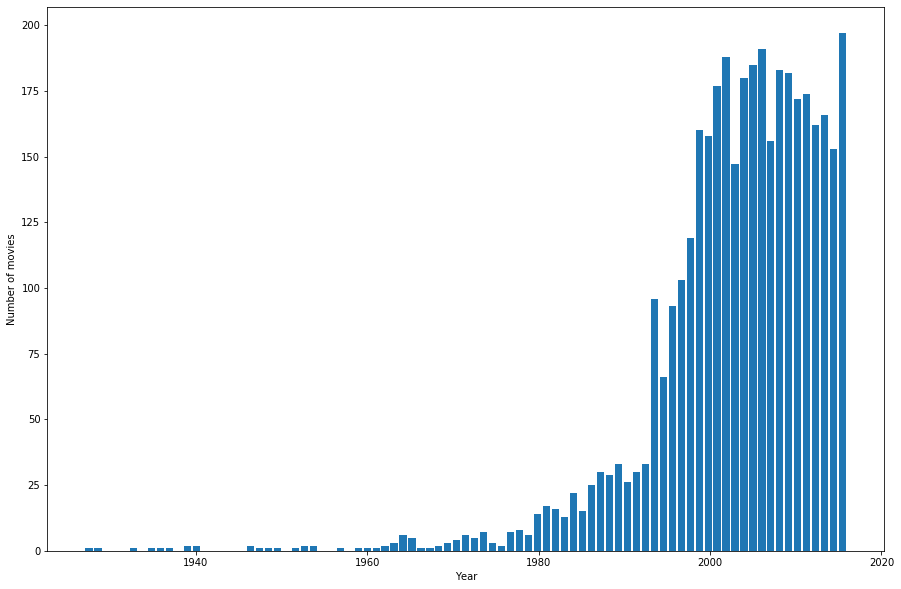

In [40]:
numOfMoviesPerYear = data['title_year']
numOfMoviesPerYear.plot.hist(bins = 85, rwidth = 0.8, figsize = (15,10))
plt.xlabel('Year')
plt.ylabel('Number of movies')
#plt.hist(data.title_year, bins = 100, rwidth = 2)

#### What are the top ten movies with the most facebook likes

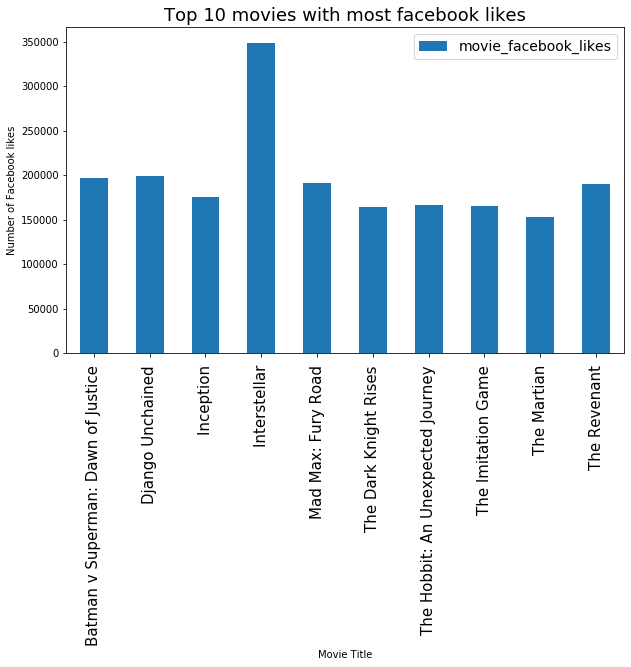

In [49]:
##Sort movies based on facebook_likes and get top 10
sorted_fl=data.sort_values(by="movie_facebook_likes",ascending=False)
top10fl=sorted_fl.head(10)
top10fl[['movie_facebook_likes']].groupby(top10fl['movie_title']).sum().plot.bar(stacked=True,figsize=(10,6))
plt.xticks(fontsize=15)
plt.legend(loc=0, prop={'size': 14})
plt.title('Top 10 movies with most facebook likes',fontsize=18)
plt.ylabel('Number of Facebook likes')
plt.xlabel('Movie Title')
plt.show()

### Removing categorical columns

Now that we have cleaned up all the numerical features, we will evaluate the rest of the categorical features.

In [144]:
# remove actor names, languages and director names
data = data.drop(['actor_3_name'], axis = 1)
data = data.drop(['actor_2_name'], axis = 1)
data = data.drop(['actor_1_name'], axis = 1)
data = data.drop(['director_name'], axis = 1)
data.shape

(3806, 20)

In [145]:
nandata = data.isnull().sum().to_frame('Number of NaN').sort_values(by = ['Number of NaN'], ascending = False)
nandata

,Number of NaN
language,2
num_critic_for_reviews,0
duration,0
imdb_score,0
actor_2_facebook_likes,0
title_year,0
budget,0
content_rating,0
country,0
num_user_for_reviews,0


In [147]:
data['language'].describe()

count        3804
unique         34
top       English
freq         3644
Name: language, dtype: object

In [148]:
3644/3804

0.9579390115667719

Nearly 96% of the films in the dataset is English. Since this is nearly constant, we will remove it from the data.

In [149]:
data = data.drop(['language'], axis = 1)

# Modeling to predict IMDB score

## Gradient Boosting Regression

In [52]:
x=data[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes','actors_facebook_likes']]
y=data['imdb_score']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=13)
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(x_train,y_train)
pred=model.predict(x_test)
error=model.loss_(y_test,pred) ##Loss function== Mean square error
print("MSE:%.3f" % error)

KeyError: "['actors_facebook_likes'] not in index"